In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sumolib
import sys
import json
import matplotlib.pyplot as plt
import numpy as np
import torch

sys.path.append('..')
from util_folder.ml_utils.data_utils.data_loader_utils import IncidentDataModule

In [3]:
import sys
sys.path.append('..')

from util_folder.ml_utils.result_utils.plot_utils import plotNet_colormap_w_norm
import matplotlib.colors as mcolors
from util_folder.dotdict import DotDict

In [6]:
# Load net and dataset info
folder_path = f'../Simulation_scenarios/motorway/Results/incident_large_long'
incident_data_module = IncidentDataModule(folder_path = folder_path,
                                          transform='standardize', # OBS this is only for easier sanity check
                                          spatial_test=False,
                                          min_impact_threshold=5,
                                          batch_size = 100)
incident_data_module.setup()
train_dataloader = incident_data_module.train_dataloader()
train_dataset = train_dataloader.dataset
val_dataloader = incident_data_module.val_dataloader()
val_dataset = val_dataloader.dataset
test_dataloader = incident_data_module.test_dataloader()
test_dataset = test_dataloader.dataset

net_path = '../Simulation_scenarios/motorway/Simulations/Base/network.net.xml'
net = sumolib.net.readNet(net_path)

with open('../Simulation_scenarios/motorway/Results/incident_large/ind_to_edge.json') as f:
    ind_to_edge = json.load(f)

*** DATA SUMMARY: ***
input_obs_full.shape=torch.Size([3117, 147, 6, 15, 3])
input_time_full.shape=torch.Size([3117, 147, 6, 15, 2])
target_full.shape=torch.Size([3117, 147, 4])
incident_info_full.shape=torch.Size([3117, 4])
network_info_full.shape=torch.Size([3117, 147, 13])



In [7]:
print(f'train size {train_dataset.input_obs_data.shape}')
print(f'val size {val_dataset.input_obs_data.shape}')
print(f'test size {test_dataset.input_obs_data.shape}')

train size torch.Size([1871, 147, 6, 15, 3])
val size torch.Size([623, 147, 6, 15, 3])
test size torch.Size([623, 147, 6, 15, 3])


In [8]:
train_obs_links = train_dataset.incident_info[...,0].unique().long()
train_obs_mask = torch.zeros(147)
train_obs_mask[train_obs_links] = 1

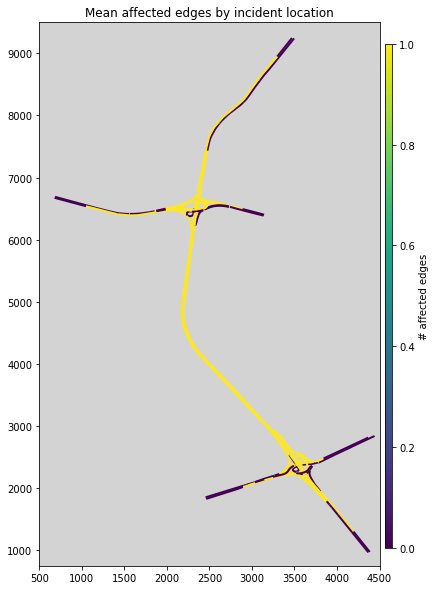

In [9]:
widths = {}
plot_options = {'defaultColor': 'black',
                'defaultWidth': 2}
plot_options = DotDict(plot_options)
area = {'xmin':500, 'xmax':4500,'ymin':750, 'ymax':9500}

norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = 'viridis'

fig, ax = plt.subplots(1, 1, figsize=(7,10))
ax, line_segments = plotNet_colormap_w_norm(net=net,
                                        array=train_obs_mask, 
                                        widths=widths, 
                                        options=plot_options, 
                                        ax=ax, 
                                        area=area,
                                        norm=norm,
                                        cmap=cmap,
                                        )
ax.set_title('Mean affected edges by incident location')
ax.set_facecolor('lightgray')

plt.subplots_adjust(wspace=0.01, hspace=0)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.15, 0.015, 0.7])
cbar = fig.colorbar(line_segments, cax=cbar_ax)
cbar.set_label('# affected edges')

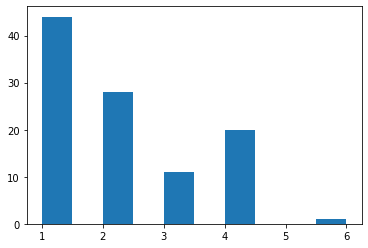

In [42]:
plt.hist(train_dataset.incident_info[...,1]);